## Tarea 4 - Modelamiento
### Cargo: Ciencia de Datos: Nicolas Alvarez Ortiz

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
import pandas as pd
credit = pd.read_csv("datosproyecto2")
credit.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,2,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,3,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,4,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,5,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [31]:
credit[credit["default payment next month"] == 1] #6636
credit[credit["default payment next month"] == 0].head() #23364

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2,2,3,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,4,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,5,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,5,6,50000,1,1,2,37,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,6,7,500000,1,1,2,29,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0


In [80]:
X = credit.iloc[:,1:25]
y = credit["default payment next month"]
y.tail()

29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, dtype: int64

In [81]:
#--------------------------------------------------------------
# Modelo con sklearn
#-------------------------------------------------------------- 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.4, random_state=42)
# Aplicar sobremuestreo 
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=1000, random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train_resampled, y_train_resampled)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

0.7597222222222222

In [82]:
y_pred = mlp_clf.predict(X_test)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.70      0.75      9357
           1       0.27      0.39      0.32      2643

    accuracy                           0.63     12000
   macro avg       0.53      0.54      0.53     12000
weighted avg       0.68      0.63      0.65     12000



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


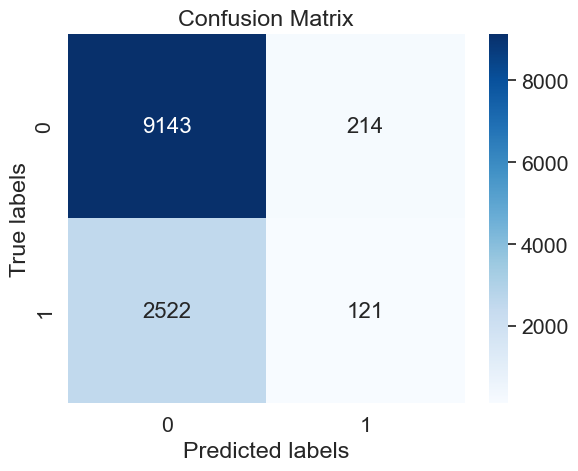

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
model_predictions1 = mlp_clf.predict(X_test)
confusion_matrix = confusion_matrix(y_test, model_predictions1)

# Plot confusion matrix
sns.set(font_scale=1.4)  # for label size
sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt="g")  # font size
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Oversampling vs Undersampling

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.4, random_state=42)
# Aplicar oversampling a la clase pequeña
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
# Aplicar undersampling a la clase pequeña for comparison
rus = RandomUnderSampler(random_state=42)
X_train_resampled_under, y_train_resampled_under = rus.fit_resample(X_train, y_train)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=1000, random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train_resampled, y_train_resampled)
accuracy_oversampled = pipeline.score(X_valid, y_valid)

pipeline.fit(X_train_resampled_under, y_train_resampled_under)
accuracy_undersampled = pipeline.score(X_valid, y_valid)

print(accuracy_oversampled, accuracy_undersampled)
print("Concluimos que el método de oversampling tiene una mayor precisión que el método de undersampling.")


0.7597222222222222 0.75375
Concluimos que el método de oversampling tiene una mayor precisión que el método de undersampling.


In [49]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Split the data into training, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.4, random_state=42)

resampling_techniques = {
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42)
}
results = {}
for name, resampler in resampling_techniques.items():
    X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)
    mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=1000, random_state=42)
    pipeline = make_pipeline(StandardScaler(), mlp_clf)
    pipeline.fit(X_train_resampled, y_train_resampled)
    y_pred = pipeline.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    results[name] = accuracy

results


{'RandomOverSampler': 0.7597222222222222,
 'SMOTE': 0.7323611111111111,
 'ADASYN': 0.7281944444444445}

### Usando Keras y tensorflow

In [72]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.4, random_state=42)
# Aplicar sobremuestreo 
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
import tensorflow as tf
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(24,)))
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="sigmoid"))  # Use sigmoid activation for binary classification
model.compile(loss="MeanSquaredError",  # Use binary cross-entropy for binary classification
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train_resampled, y_train_resampled, epochs=100,
                    validation_data=(X_valid, y_valid))



Epoch 1/100
527/527 [==============================] - 5s 6ms/step - loss: 0.5016 - accuracy: 0.4995 - val_loss: 0.4958 - val_accuracy: 0.7753
Epoch 2/100
527/527 [==============================] - 4s 7ms/step - loss: 0.5044 - accuracy: 0.5000 - val_loss: 0.4958 - val_accuracy: 0.7753
Epoch 3/100
527/527 [==============================] - 3s 6ms/step - loss: 0.5044 - accuracy: 0.5000 - val_loss: 0.4958 - val_accuracy: 0.7753
Epoch 4/100
527/527 [==============================] - 3s 6ms/step - loss: 0.5044 - accuracy: 0.5000 - val_loss: 0.4958 - val_accuracy: 0.7753
Epoch 5/100
527/527 [==============================] - 3s 6ms/step - loss: 0.5044 - accuracy: 0.5000 - val_loss: 0.4958 - val_accuracy: 0.7753
Epoch 6/100
527/527 [==============================] - 8s 15ms/step - loss: 0.5044 - accuracy: 0.5000 - val_loss: 0.4958 - val_accuracy: 0.7753
Epoch 7/100
527/527 [==============================] - 4s 8ms/step - loss: 0.5044 - accuracy: 0.5000 - val_loss: 0.4958 - val_accuracy: 0.775

In [73]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

375/375 [==============================] - 2s 6ms/step - loss: 0.4952 - accuracy: 0.7797
Test accuracy: 0.7797499895095825


In [74]:
model_predictions = model.predict(X_test)
model_predictions

375/375 [==============================] - 1s 3ms/step


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [78]:
import numpy as np

model_predictions = np.where(model_predictions > 0.5, 1, 0)

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming model_predictions is the predicted values of your model on the test data
conf_matrix = confusion_matrix(y_test, model_predictions)

# Plot confusion matrix
sns.set(font_scale=1.4)  # for label size
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt="g")  # font size
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 125       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
